In [128]:
import pandas as pd

tabla = pd.read_html('https://sede.agenciatributaria.gob.es/AEAT/Contenidos_Comunes/La_Agencia_Tributaria/Estadisticas/Publicaciones/sites/irpfmunicipios_ccaa/2020/jrubik6c2919f8565ed748cafc179390732e425389d0f2.html')

In [129]:
df = tabla[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Columns: 187 entries, Distribución Geográfica to Número total declaraciones
dtypes: float64(1), object(186)
memory usage: 80.5+ KB


In [130]:
df.head(5)

,Distribución Geográfica,Distribución Geográfica.1,Importe Partida 3,Importe Partida 7,Importe Partida 8,Importe Partida 11,Importe Partida 12,Importe Partida 13,Importe Partida 14,Importe Partida 15,...,Importe Partida 1559,Importe Partida 1560,Importe Partida 1601,Importe Partida 1602,Importe Partida 1604,Importe Partida 1605,Suma deducciones (parte autonómica,Suma deducciones (parte estatal),Suma resto de deducciones,Número total declaraciones
0,Provincias,Santa Cruz de Tenerife,8.605.173.423,33.611.278,13.544.331,31.194.477,8.621.157.771,429.453.172,6.481.552,4.053.067,...,2.030.491,37.856.147,559.846,375.072,10.635.547,38.249.392,63.142.807,30.093.556,27.858.808,453.204
1,Municipios,ADEJE,289.266.717,1.800.795,268.743,555.974,290.781.476,17.079.781,131.196,61.571,...,9.363,94.260,17.864,7.680,197.721,673.053,2.424.985,1.133.701,1.053.412,19.056
2,Municipios,AGULO,5.108.251,5.096,S.E.,S.E.,5.121.273,228.428,4.526,S.E.,...,S.E.,30.052,0,S.E.,0,0,31.044,10.260,7.468,343.000
3,Municipios,ALAJERÓ,11.825.437,21.836,6.807,S.E.,11.832.931,654.571,11.796,3.045,...,0,5.572,0,0,S.E.,S.E.,85.883,25.901,9.966,711.000
4,Municipios,ARAFO,46.666.797,170.412,97.653,30.120,46.904.742,2.437.746,43.276,17.859,...,5.956,40.754,S.E.,S.E.,S.E.,104.087,314.653,157.340,131.767,2.353


In [131]:
# Borrar una columna innecesaria
df.drop(['Distribución Geográfica'], axis=1, inplace= True)

In [132]:
# Sacar dos columnas para el gráfico
df_1 = df[['Distribución Geográfica.1', 'Importe Partida 3']].copy()
df_1.head(5)

,Distribución Geográfica.1,Importe Partida 3
0,Santa Cruz de Tenerife,8.605.173.423
1,ADEJE,289.266.717
2,AGULO,5.108.251
3,ALAJERÓ,11.825.437
4,ARAFO,46.666.797


In [133]:
# comprobar los tipos
df_1.dtypes

Distribución Geográfica.1    object
Importe Partida 3            object
dtype: object

In [140]:
# Limpiar los puntos del formato de miles de euros
df_1 = df_1.replace('\.','', regex=True)
df_1.head(5)

,Distribución Geográfica.1,Importe Partida 3
0,Santa Cruz de Tenerife,8605173423
1,ADEJE,289266717
2,AGULO,5108251
3,ALAJERÓ,11825437
4,ARAFO,46666797


In [154]:
# Convertir a números para poder hacer la gráfica
df_1 = df_1.astype({"Importe Partida 3": int})
df_1.head(5)

,Distribución Geográfica.1,Importe Partida 3
1,ADEJE,289266717
2,AGULO,5108251
3,ALAJERÓ,11825437
4,ARAFO,46666797
5,ARICO,58471632


In [141]:
# Comprobar si son correctos los tipos
df_1.dtypes

Distribución Geográfica.1    object
Importe Partida 3             int64
dtype: object

In [148]:
# Quitar el primer registro, que es el total de la provincia y deforma el gráfico
df_1.drop(0, inplace=True)

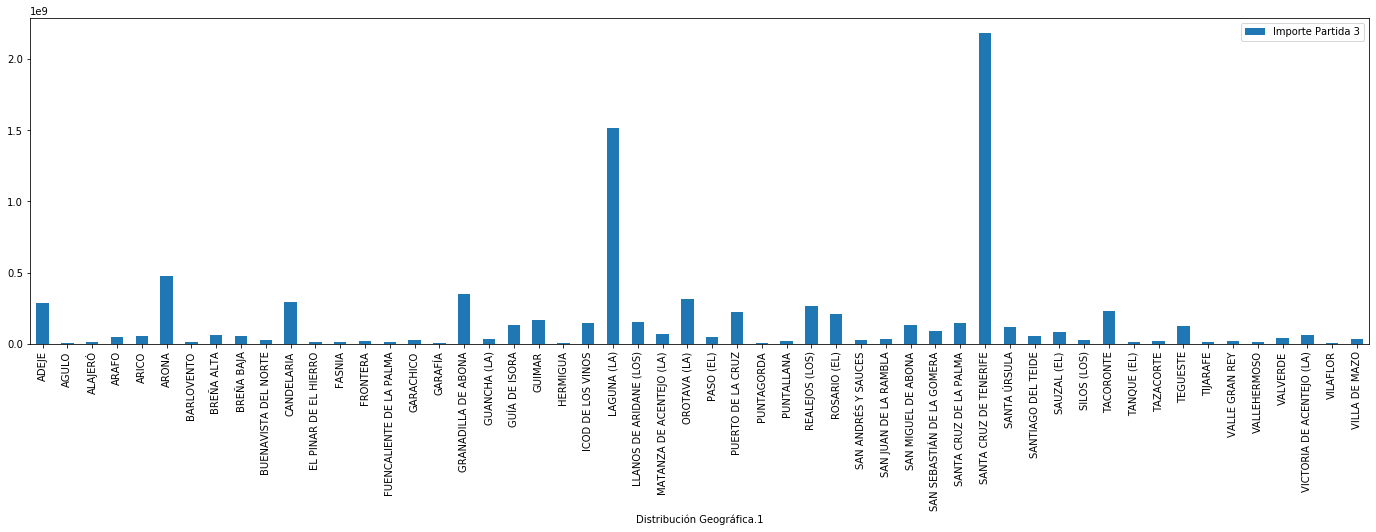

In [153]:
# Un gráfico de barras.
df_1.plot.bar(x='Distribución Geográfica.1', y= 'Importe Partida 3',figsize=(24,6))